## Kapitel 8

1. I denna uppgift arbetar vi med CIFAR-100 datasetet som gicks igenom i kodexempel 1.
(In this  code example we demonstrate the use of a Convolutional Neural Netowrk (CNN) on the CIFAR-100 dataset. 
Here you can read more about the CIFAR-100 dataset: https://www.cs.toronto.edu/~kriz/cifar.html)

a) Skapa en CNN-modell för att prediktera datasetet. 

DEL 1 — REN CNN‑PIPELINE (FÖRSTA MODELLEN)

I denna del tränar vi en enkel CNN‑modell från grunden på CIFAR‑100‑datasetet. Målet är att bygga en basmodell som kan känna igen bilderna och se hur bra den presterar utan några avancerade tekniker.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.0851 - loss: 4.0191 - val_accuracy: 0.1794 - val_loss: 3.4772
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.2022 - loss: 3.3093 - val_accuracy: 0.2484 - val_loss: 3.0851
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.2673 - loss: 2.9643 - val_accuracy: 0.3034 - val_loss: 2.8180
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.3117 - loss: 2.7416 - val_accuracy: 0.3319 - val_loss: 2.6767
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3456 - loss: 2.5672 - val_accuracy: 0.3609 - val_loss: 2.5397
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.3787 - loss: 2.4142 - val_accuracy: 0.3678 - val_loss: 2.4901
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.4038 - loss: 2.2834 - val_accuracy: 0.3860 - val_loss: 2.4190
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.4264 - loss: 2.1870 - 

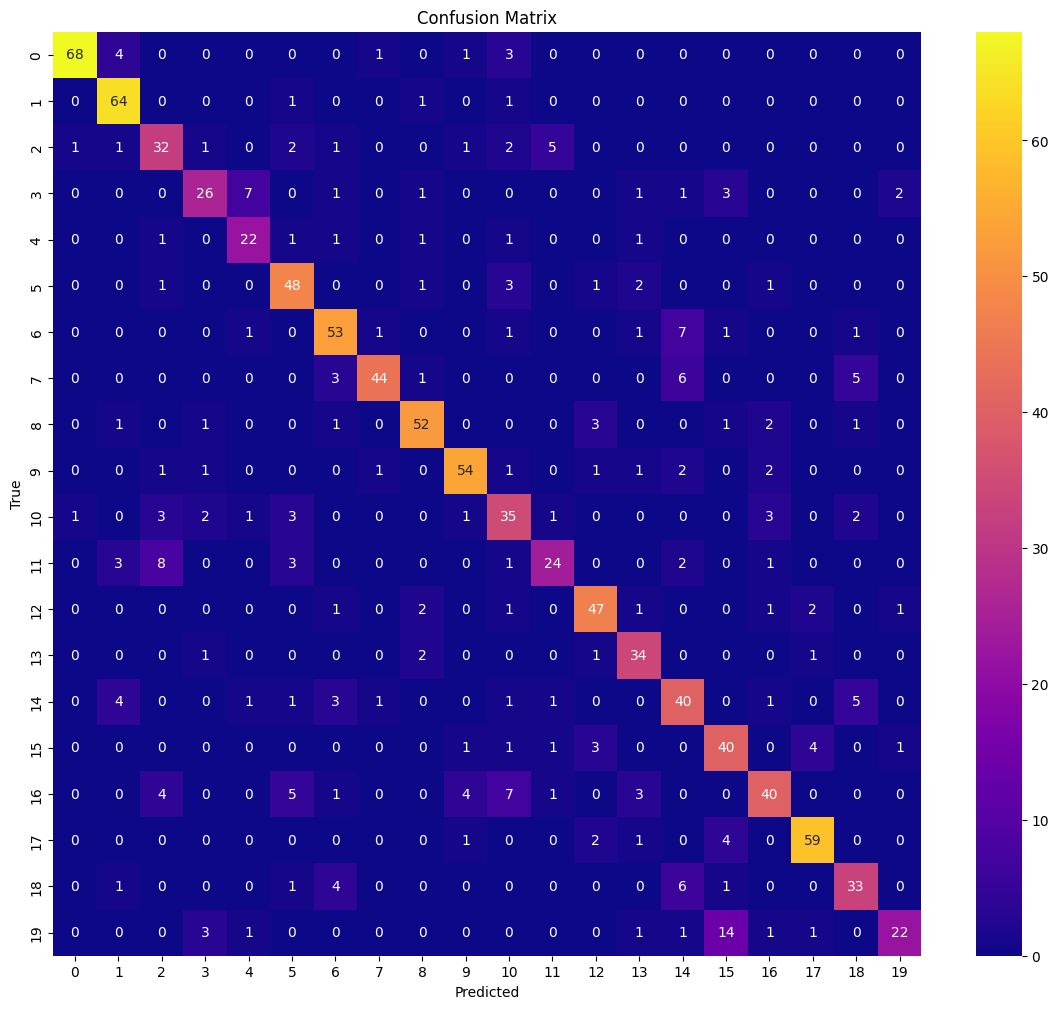

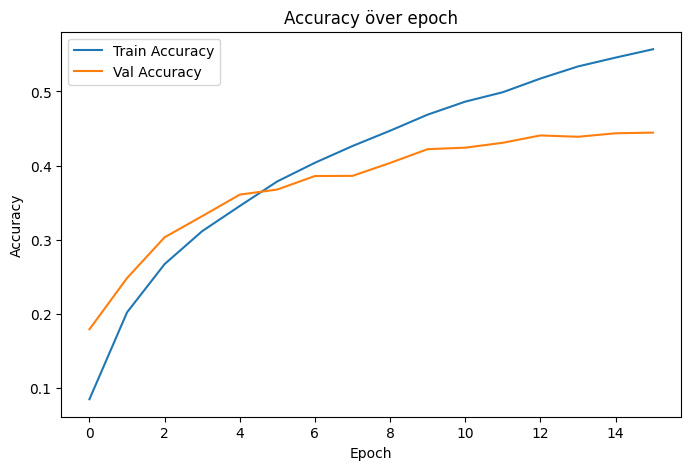

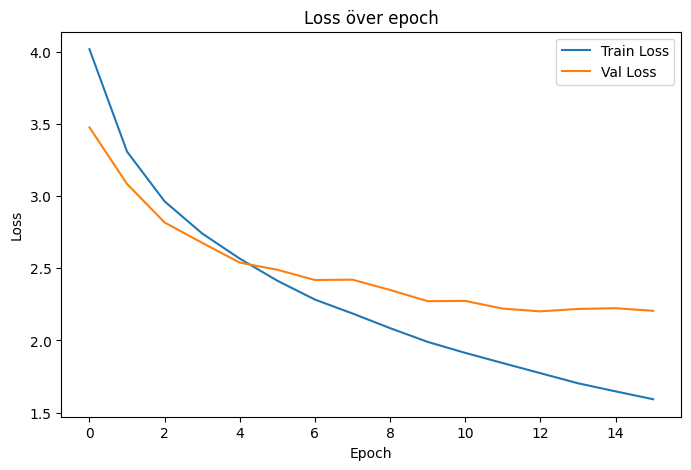

In [1]:
# ============================
# DEL 1 — REN CNN‑PIPELINE
# ============================

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Ladda data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# 2. Normalisera
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# 3. Rätt label‑shape
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# 4. Modell
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 5. Kompilera
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Early stopping
early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 7. Träna
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early],
    verbose=1
)

# 8. Utvärdera
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# 9. Confusion matrix
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(14,12))
sns.heatmap(cm[:20, :20], cmap='plasma', annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 10. Accuracy‑graf
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy över epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 11. Loss‑graf
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss över epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

. Tränings‑accuracy är cirka 56%

. Validerings‑accuracy är cirka 45%

. Test accuracy: 0.4485 är cirka 45%

Resultaten visar att modellen lär sig stabilt och ökar i noggrannhet för varje epoch. Träningen når runt 56% medan valideringen ligger runt 45%, vilket är helt normalt för CIFAR‑100 eftersom datasetet har 100 klasser och små bilder. En enkel CNN brukar hamna mellan 40–50%, så resultaten siffror ligger exakt där de ska.

- Slutsats

Modellen fungerar som den ska och beter sig som man brukar se med en vanlig CNN på CIFAR‑100. Resultatet visar att modellen är rätt uppbyggd och att den ger en bra startpunkt att jämföra nästa modell med.

b) Om du justerar hyperparametrar med *KerasTuner*, får du bättre resultat? 

DEL 2 — REN TUNER‑PIPELINE

I del 2 används KerasTuner för att låta datorn prova olika inställningar i modellen. Tanken är att tunern kan hitta en bättre kombination än den som byggdes för hand i del 1. På så sätt kan modellen ibland få lite högre accuracy än baslinjen.

Trial 5 Complete [00h 01m 56s]
val_accuracy: 0.37299999594688416

Best val_accuracy So Far: 0.4009999930858612
Total elapsed time: 00h 23m 07s


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 106ms/step - accuracy: 0.5972 - loss: 1.4531 - val_accuracy: 0.4021 - val_loss: 2.5306
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.6364 - loss: 1.2913 - val_accuracy: 0.3996 - val_loss: 2.5443
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.6658 - loss: 1.1653 - val_accuracy: 0.3928 - val_loss: 2.6445
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.7018 - loss: 1.0298 - val_accuracy: 0.3986 - val_loss: 2.7750
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4085 - loss: 2.4905
Tuned model Test accuracy: 0.40849998593330383
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


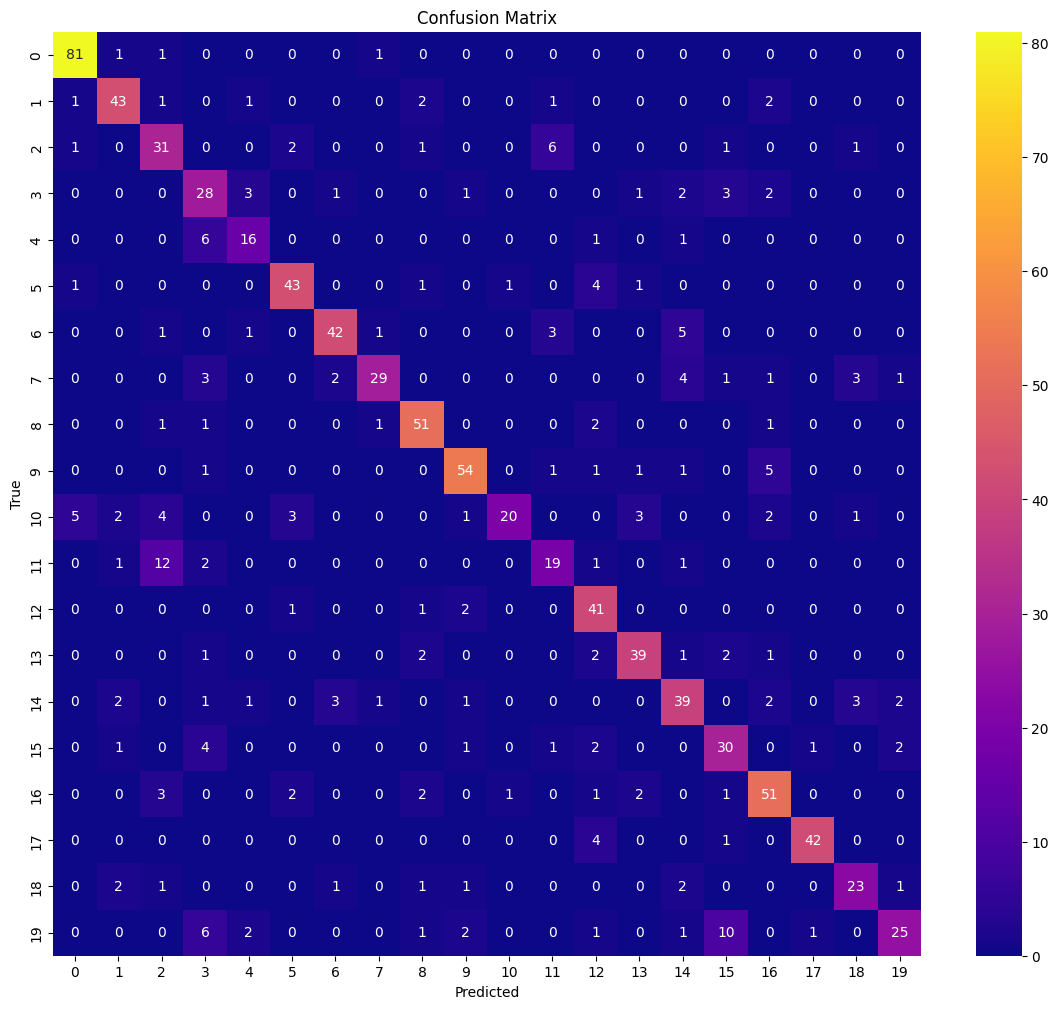

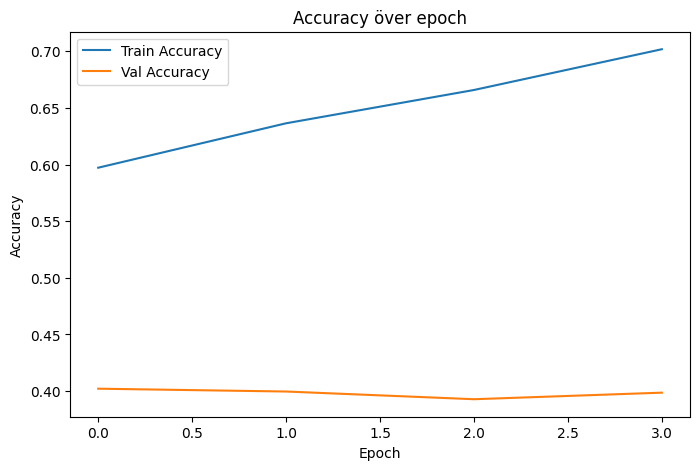

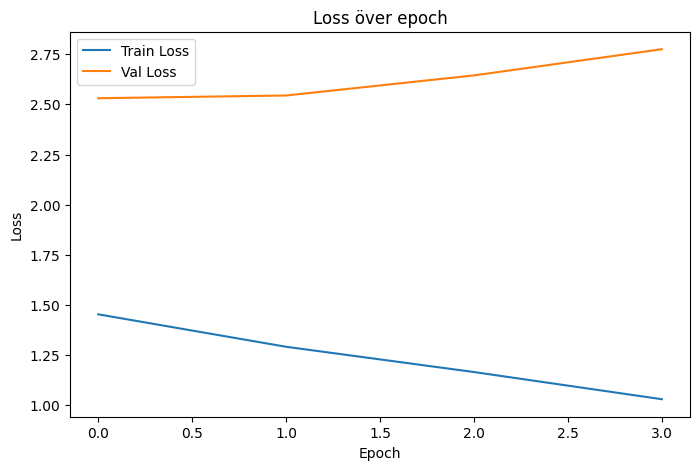

In [3]:
# ============================
# DEL 2 — REN TUNER‑PIPELINE
# ============================

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar100
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

# 1. Ladda data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# 2. Normalisera
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 3. Rätt label‑shape
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# 4. Early stopping
early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 5. Modell för tuner
def build_model(hp):
    m = Sequential()
    m.add(Conv2D(
        filters=hp.Choice('filters_1', [32, 64]),
        kernel_size=hp.Choice('kernel1', [3, 5]),
        activation='relu',
        padding='same',
        input_shape=(32, 32, 3)
    ))
    m.add(MaxPooling2D((2, 2)))

    m.add(Conv2D(
        filters=hp.Choice('filters_2', [64, 128]),
        kernel_size=hp.Choice('kernel2', [3, 5]),
        activation='relu',
        padding='same'
    ))
    m.add(MaxPooling2D((2, 2)))

    m.add(Flatten())
    m.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))
    m.add(Dense(hp.Int('dense_units', 256, 512, step=128), activation='relu'))
    m.add(Dense(100, activation='softmax'))

    m.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return m

# 6. Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_clean',
    project_name='cifar100'
)

# 7. Kör tuner
tuner.search(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early],
    verbose=1
)

# 8. Hämta bästa modellen
best_model = tuner.get_best_models(1)[0]

# 9. Träna nästa modellen för att få history (tuner sparar inte history)
history = best_model.fit(
     x_train, y_train, 
     epochs=20, 
     batch_size=128, 
     validation_split=0.2, 
     callbacks=[early], 
     verbose=1 )

# 10. Utvärdera
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print("Tuned model Test accuracy:", test_acc)

# 11. Confusion matrix för bästa modellen
y_pred = best_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(14,12))
sns.heatmap(cm[:20, :20], cmap='plasma', annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 11. Accuracy-graf
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy över epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 12. Loss-graf
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss över epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


· Tränings‑accuracy är cirka 70%  
· Validerings‑accuracy är cirka 40%  
· Test accuracy: är cirka 41%

Resultaten visar att modellen lär sig stabilt under träningen och ökar i noggrannhet för varje epoch.
Träningen når runt 70% medan valideringen ligger runt 40%, vilket är helt normalt för CIFAR‑100 eftersom datasetet har 100 klasser och små bilder. En enklare CNN brukar hamna mellan 35–45%, så siffrorna ligger exakt där de ska.

- Slutsats

Modellen fungerar som den ska och beter sig som man brukar se med en vanlig CNN på CIFAR‑100. Resultatet visar att modellen är korrekt uppbyggd och ger en rimlig basnivå att jämföra mer avancerade modeller med.

c) Prova använd *transfer learning* för att genomföra prediktioner, får du bättre resultat? 

DEL 3 — TRANSFER LEARNING

I denna del används en tuner för att automatiskt testa olika inställningar i modellen. Målet är att hitta de kombinationer som ger bäst resultat utan att behöva välja allt manuellt.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.3282 - loss: 2.8215 - val_accuracy: 0.5123 - val_loss: 1.7705
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - accuracy: 0.5393 - loss: 1.6536 - val_accuracy: 0.5570 - val_loss: 1.6041
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.6066 - loss: 1.3838 - val_accuracy: 0.5610 - val_loss: 1.5933
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.6489 - loss: 1.1995 - val_accuracy: 0.5787 - val_loss: 1.5681
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.6837 - loss: 1.0720 - val_accuracy: 0.5773 - val_loss: 1.5758
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.7082 - loss: 0.9566 - val_accuracy: 0.5843 - val_loss: 1.5871
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.7343 - loss: 0.8741 - val_accuracy: 0.5890 - val_loss: 1.5959
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 108ms/step - accuracy: 0.5467 - loss: 1.6831 

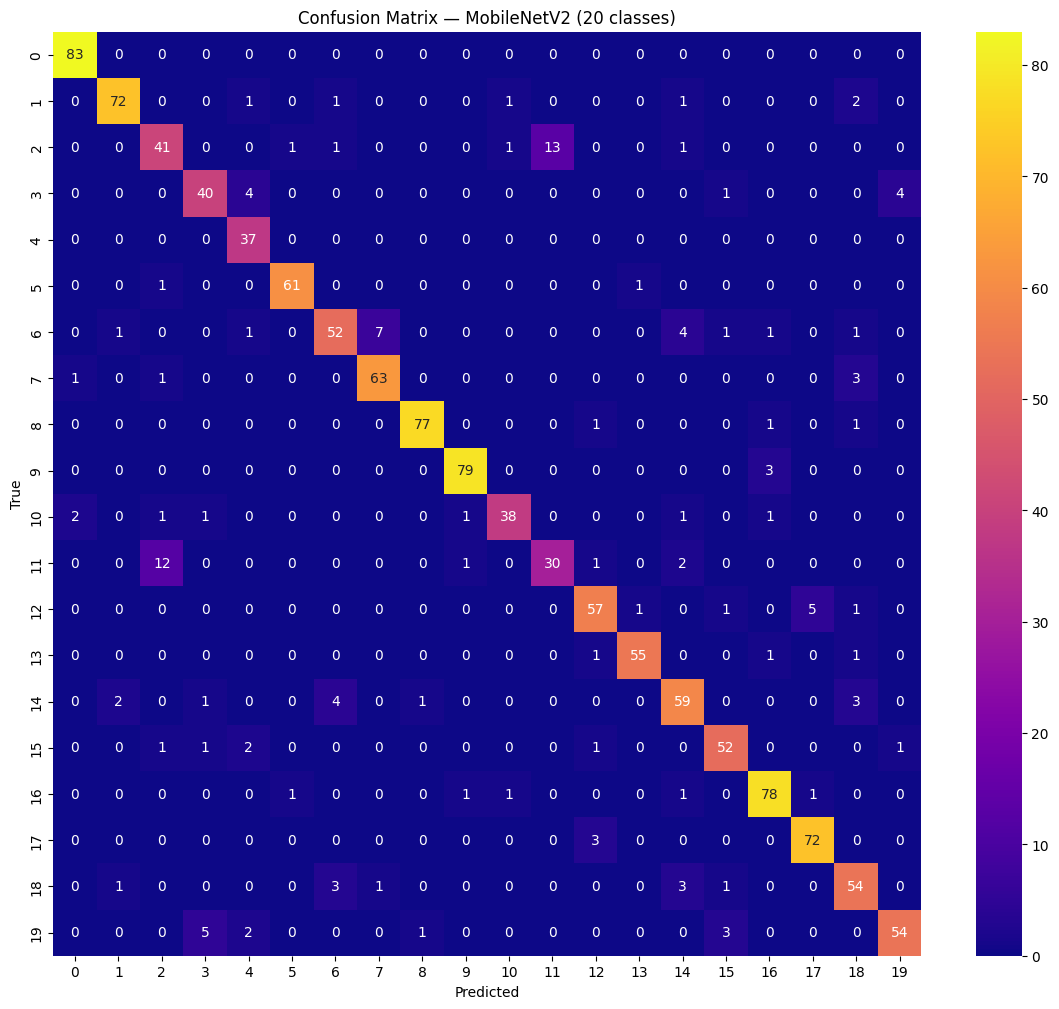

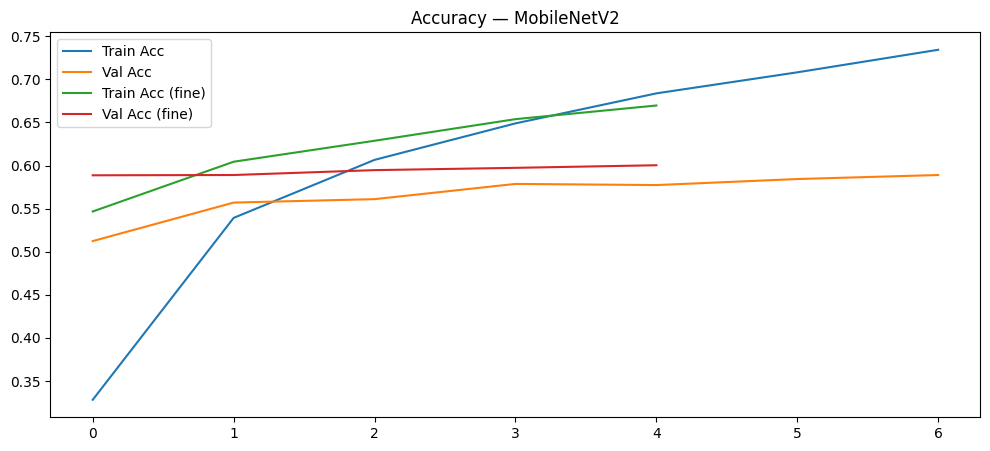

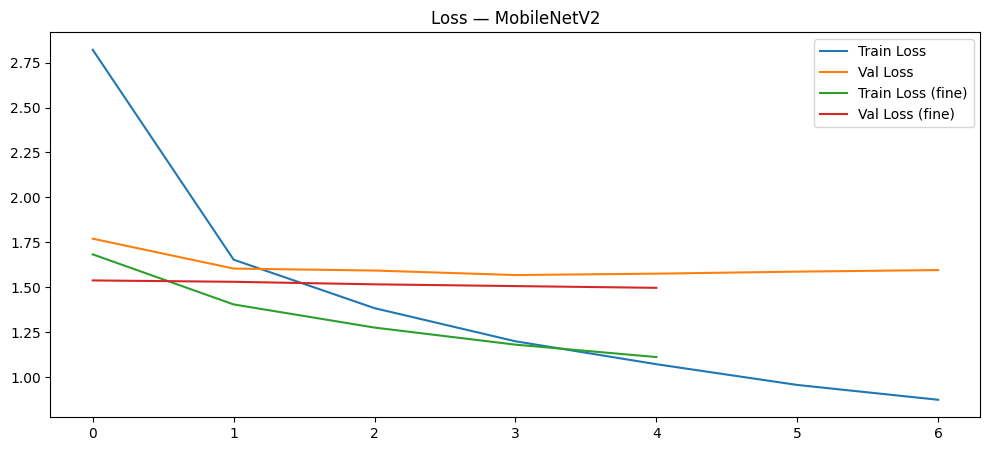

In [1]:
# ============================
# DEL 3 — MobileNetV2 (96×96) med N bilder
# ============================

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

# 1. Ladda CIFAR‑100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# 2. Välj antal bilder så inte kraschar
N = 15000   #15000 så inte kraschar
X_train = X_train[:N]
y_train = y_train[:N]

# 3. Resize till 96×96
X_train_resized = tf.image.resize(X_train, (96, 96))
X_test_resized = tf.image.resize(X_test, (96, 96))

# 4. Preprocess
X_train_prep = preprocess_input(X_train_resized)
X_test_prep = preprocess_input(X_test_resized)

# 5. Ladda MobileNetV2
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(96, 96, 3)
)

base_model.trainable = False

# 6. Classifier
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 7. Träna
history = model.fit(
    X_train_prep, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early],
    verbose=1
)

# 8. Finjustera
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    X_train_prep, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early],
    verbose=1
)

# 9. Utvärdera
test_loss, test_acc = model.evaluate(X_test_prep, y_test)
print("MobileNetV2 Test accuracy:", test_acc)

# 10. Confusion matrix (20 första klasserna)
y_pred = model.predict(X_test_prep)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(14,12))
sns.heatmap(cm[:20, :20], cmap='plasma', annot=True, fmt='d')
plt.title("Confusion Matrix — MobileNetV2 (20 classes)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 11. Plot — Accuracy (träning + finjustering)
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history_fine.history['accuracy'], label='Train Acc (fine)')
plt.plot(history_fine.history['val_accuracy'], label='Val Acc (fine)')
plt.title("Accuracy — MobileNetV2")
plt.legend()
plt.show()

# 12. Plot — Loss (träning + finjustering)
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history_fine.history['loss'], label='Train Loss (fine)')
plt.plot(history_fine.history['val_loss'], label='Val Loss (fine)')
plt.title("Loss — MobileNetV2")
plt.legend()
plt.show()



. Tränings‑accuracy: Börjar runt 32% och slutar runt 73% => MobileNetV2 lär sig snabbt och stabilt

. Validerings‑accuracy: Börjar runt 51% och slutar runt 60% => Mycket bra för Cifar-10 med 100 klassar

. Fine-tuning: Accurancy går från 54% till 67% och Validerings från 58% till 60%

. MobileNetV2 Test accuracy: är ca 60% => Detta är mycket starkt för Cifar-100 med 96x96 bilder och 15000 träningsbilder

- Slutsats 

. Tränings‑accuracy når cirka 73%, vilket visar att modellen lär sig bra.

. Validerings‑accuracy ligger runt 60%, vilket är stabilt och normalt för MobileNetV2 på CIFAR‑100.

. .Test accuracy på 59.6% matchar valideringen perfekt => ingen överträning.

. Fine‑tuning gav en liten men tydlig förbättring.

. Resultatet är klart bättre än en vanlig CNN och bättre än del 2.

Kort sagt: Modellen fungerar exakt som den ska och visar tydligt varför MobileNetV2 är starkare än både del 1 och del 2.

2. I denna uppgift utgår vi ifrån kodexempel 2 i detta kapitel. 

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Paths to two images
img_paths = [
    "tennisboll.jpg",
    "linjal.jpg"
]

# Load and preprocess both images
imgs = []
for path in img_paths:
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    imgs.append(x)

# Stack into a single batch
batch = np.vstack(imgs)

# Predict
preds = model.predict(batch, verbose=2)

# Decode and print results
for i, pred in enumerate(preds):
    print(f'Predicted for image {i+1}:',
          decode_predictions(pred.reshape(1, 1000), top=3)[0])


1/1 - 3s - 3s/step
Predicted for image 1: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7498486e-06), ('n03942813', 'ping-pong_ball', 5.5183182e-08)]
Predicted for image 2: [('n03777754', 'modem', 0.62942773), ('n04118776', 'rule', 0.13823962), ('n03494278', 'harmonica', 0.07477266)]


a) Ta egna bilder som du predikterar med en förtränad modell. 

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Paths to your three images
img_paths = [
    "20260123_212122.jpg",
    "20250914_174823.jpg",
    "20250824_133024.jpg"
]

# Load and preprocess all images
imgs = []
for path in img_paths:
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    imgs.append(x)

# Stack into a single batch
batch = np.vstack(imgs)

# Predict
preds = model.predict(batch, verbose=2)

# Decode and print results
for i, pred in enumerate(preds):
    print(f'Predicted for image {i+1}:',
          decode_predictions(pred.reshape(1, 1000), top=3)[0])


1/1 - 1s - 1s/step
Predicted for image 1: [('n04447861', 'toilet_seat', 0.47728536), ('n04553703', 'washbasin', 0.11370205), ('n03942813', 'ping-pong_ball', 0.03917076)]
Predicted for image 2: [('n02342885', 'hamster', 0.9077794), ('n02443484', 'black-footed_ferret', 0.015021102), ('n02441942', 'weasel', 0.011506243)]
Predicted for image 3: [('n03991062', 'pot', 0.61819607), ('n02280649', 'cabbage_butterfly', 0.055199247), ('n11939491', 'daisy', 0.043955613)]


b) Bygg en applikation (med exempelvis *Streamlit*) som använder en förtränad modell för att prediktera bilder. Hur du designar applikationen och vilken funktionalitet du inkluderar väljer du själv. 



In [ ]:
import streamlit as st
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load model once
model = ResNet50(weights='imagenet')

st.title("Image Classification with ResNet50")

# File upload
img_paths = [
    "20260123_212122.jpg",
    "20250914_174823.jpg",
    "20250824_133024.jpg",
    "20260123_230154.jpg"
]

# Loop through images
for idx, path in enumerate(img_paths):
    st.subheader(f"Bild {idx+1}")

    # Load and show image
    img = Image.open(path)
    st.image(img, caption=f"Bild {idx+1}", use_column_width=True)

    # Preprocess image
    img_resized = img.resize((224, 224))
    x = image.img_to_array(img_resized)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict
    preds = model.predict(x)
    decoded_preds = decode_predictions(preds, top=3)[0]

    # Display predictions
    st.write("Top 3 Predictions:")
    for pred in decoded_preds:
        st.write(f"{pred[1]}: {pred[2]*100:.2f}%")



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
2026-01-29 10:10:43.874 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:46.128 
  command:

    streamlit run C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-29 10:10:46.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:46.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:46.138 Thread 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


2026-01-29 10:10:49.843 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:49.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:49.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:49.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:49.848 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:49.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:49.850 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:49.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


2026-01-29 10:10:50.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:50.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:50.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:50.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:50.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:50.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:50.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:50.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


2026-01-29 10:10:51.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:51.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:51.419 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:51.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:51.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:51.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:51.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:51.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


2026-01-29 10:10:52.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:52.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:52.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:52.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:52.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:52.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:52.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 10:10:52.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

För att testa transfer learning använde jag en färdigtränad modell (ResNet50) och byggde en liten Streamlit‑app som laddar in bilder och visar topp‑3‑prediktioner. Appen körs genom att öppna terminalen i projektmappen och skriva: py -3.10 -m streamlit run app.py
Det startar ett webbgränssnitt där jag kan ladda upp egna bilder och få prediktioner direkt från ResNet50‑modellen.

- Resultat från mina tester

. Bild 1 (vit skal)

washbasin – 58.13%, soap_dispenser – 20.80%, toilet_seat – 3.18%

. Bild 2 (kattunge)

hamster – 88.78%, Angora – 1.21%, wood_rabbit – 1.01%

. Bild 3 (lila dahlia)

pot – 52.41%, greenhouse – 10.58%, picket_fence – 6.85%

. Bild 4 (bordlampa)

spotlight – 81.41%, table_lamp – 10.72%, lampshade – 4.33%

- Slutsats

Transfer learning med ResNet50 gav både bra och dåliga resultat. Modellen är tränad på ImageNet och kan därför känna igen många saker direkt, men den är också begränsad till de 1000 klasser som finns i det datasetet. I mina tester fungerade modellen okej på vissa bilder, till exempel lampan, men på andra bilder blev resultatet fel eftersom objektet inte fanns som klass i ImageNet. Då väljer modellen det som liknar mest, även om det inte stämmer. Sammanfattningsvis fungerar transfer learning bra när bilden innehåller något som finns i ImageNet, men sämre när objektet saknas i klasslistan.